<a href="https://colab.research.google.com/github/2303a52074/AIML/blob/main/AIML_ASSIGNMENT_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
power_com = fetch_ucirepo(id=235)

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [ ]:
X = power_com.data.features
y = power_com.data.targets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
print(f"Top 5 Elecricity Consumption features:\n{power_com.data.features.sort_values(by='Date', ascending=False).head()}")


Top 5 Elecricity Consumption features:
             Date      Time Global_active_power Global_reactive_power  \
1961817  9/9/2010  02:21:00               0.238                 0.052   
1962837  9/9/2010  19:21:00               0.390                 0.132   
1962857  9/9/2010  19:41:00               2.938                 0.436   
1962856  9/9/2010  19:40:00               2.898                 0.416   
1962855  9/9/2010  19:39:00               2.886                 0.398   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
1961817  239.790            1.000          0.000          1.000   
1962837  243.580            1.600          0.000          0.000   
1962857  241.510           12.200          0.000         38.000   
1962856  241.090           12.000          0.000         38.000   
1962855  241.070           12.000          0.000         38.000   

         Sub_metering_3  
1961817             1.0  
1962837             1.0  
1962857             1.0  
1962856        

In [ ]:
print(f"Top 5 Voltage Consumption features:\n{power_com.data.features.sort_values(by='Date', ascending=True).tail()}")


Top 5 Voltage Consumption features:
             Date      Time Global_active_power Global_reactive_power  \
1962153  9/9/2010  07:57:00               1.430                 0.080   
1962152  9/9/2010  07:56:00               1.428                 0.076   
1962151  9/9/2010  07:55:00               1.392                 0.000   
1962149  9/9/2010  07:53:00               1.392                 0.000   
1961677  9/9/2010  00:01:00               0.808                 0.116   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
1962153  239.200            6.000          0.000          1.000   
1962152  238.390            6.000          0.000          1.000   
1962151  238.050            5.800          0.000          0.000   
1962149  238.610            5.800          0.000          0.000   
1961677  246.140            3.400          0.000          0.000   

         Sub_metering_3  
1962153            18.0  
1962152            18.0  
1962151            18.0  
1962149           

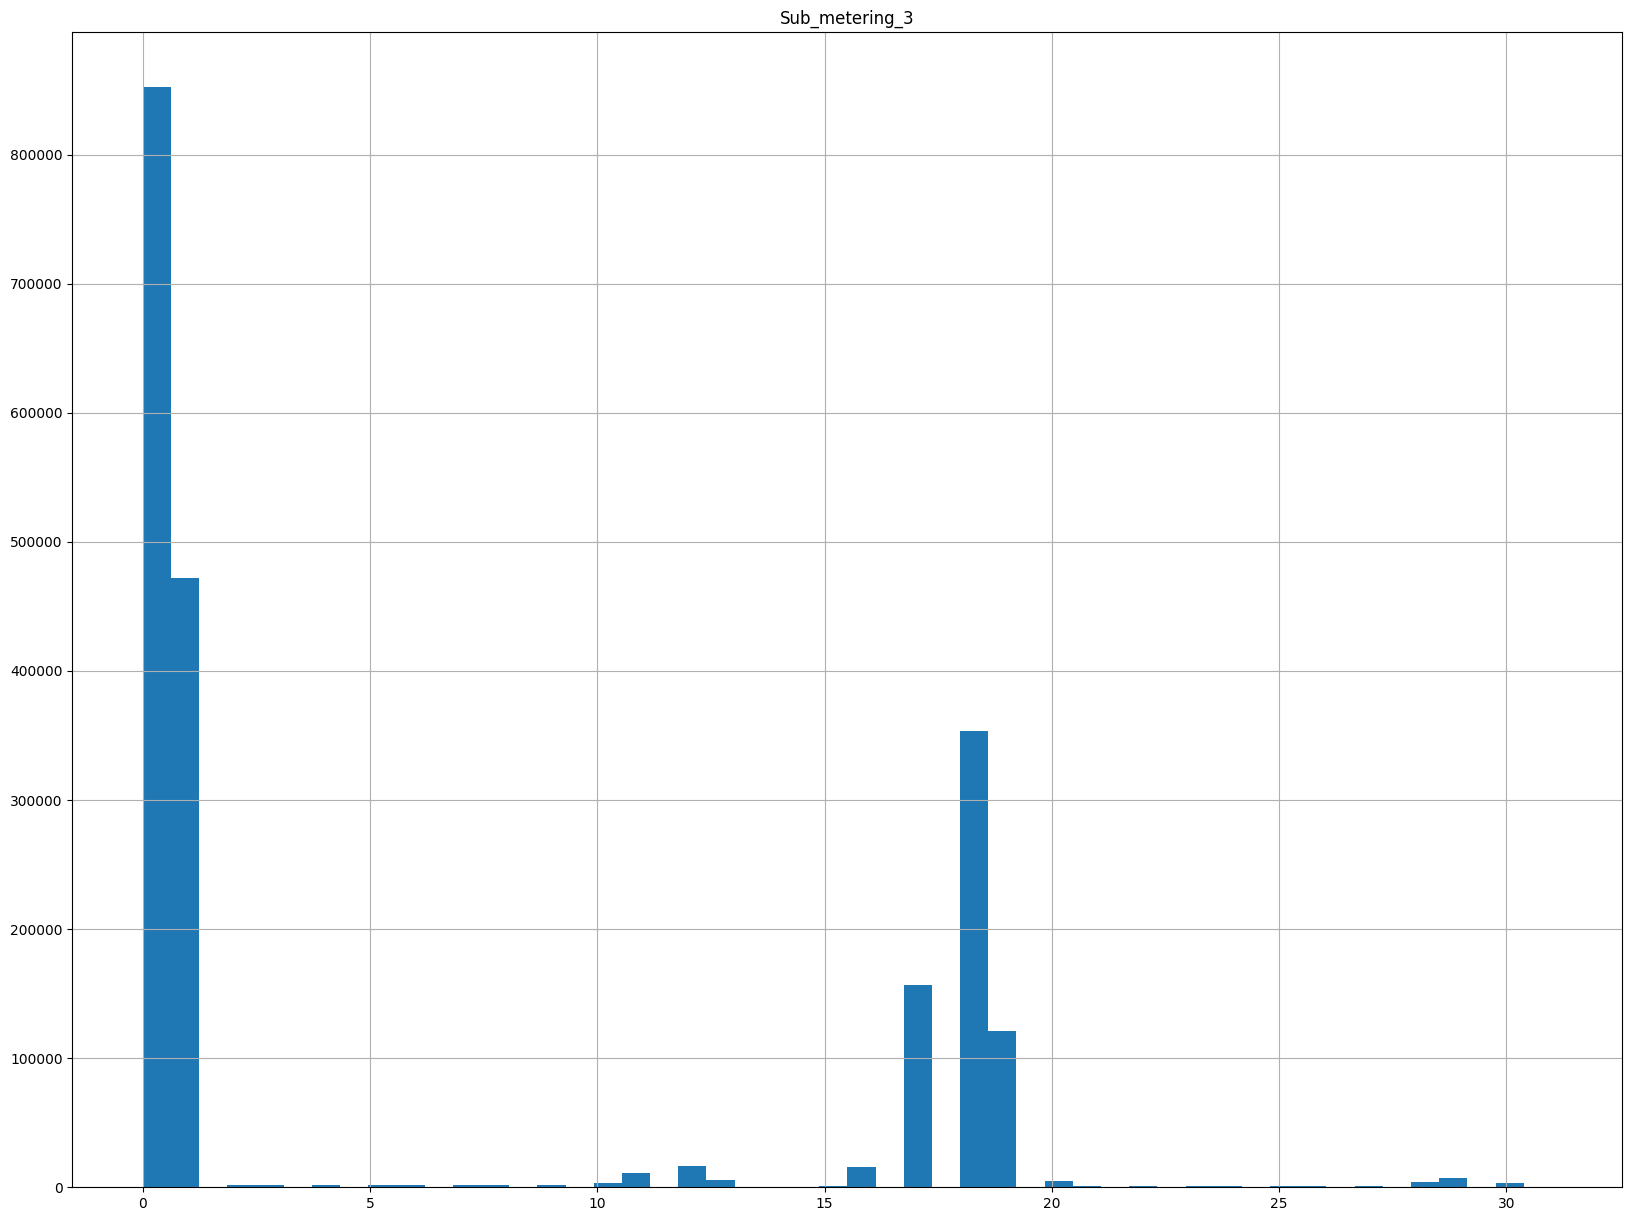

In [ ]:
power_com_df = pd.DataFrame(power_com.data.features)
power_com_df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
power_com_df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
print(f"Max and Min Voltage Comsumption\n{np.max(power_com_df.Voltage.value_counts())}\n{np.min(power_com_df.Voltage.value_counts())}")


Max and Min Voltage Comsumption
25979
1


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

X = power_com_df.drop(['Date','Time'], axis=1)
y = power_com_df.Voltage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
721792,0.428,0.236,245.840,2.000,0.000,0.000,1.0
1629339,0.316,0.100,245.590,1.200,0.000,0.000,1.0
1788820,1.020,0.072,242.820,4.200,0.000,0.000,1.0
290671,0.196,0.084,239.080,0.800,0.000,0.000,0.0
276338,0.206,0.092,240.270,1.000,0.000,0.000,0.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #Plot styling
import numpy as np

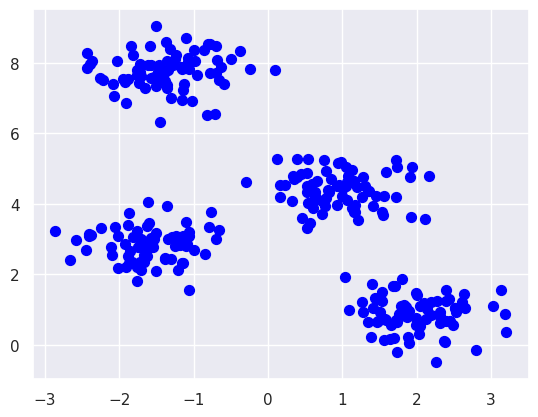

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50,color='blue');

In [ ]:
X.shape

(300, 2)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_kmeans, y_true)

0.0

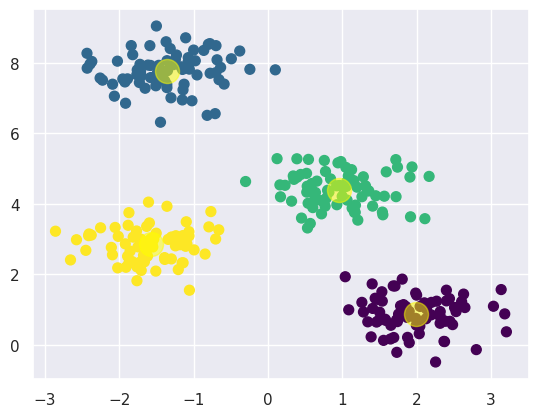

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, \
            cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], \
            c='yellow', s=300, alpha=0.5);

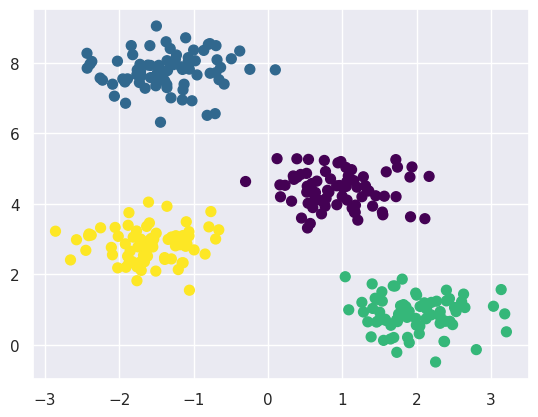

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
    # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

    # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

    # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');


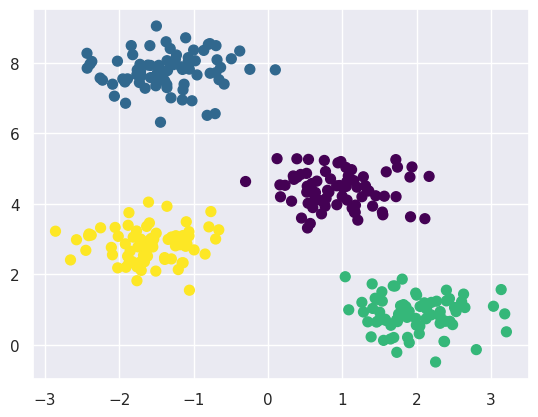

In [ ]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

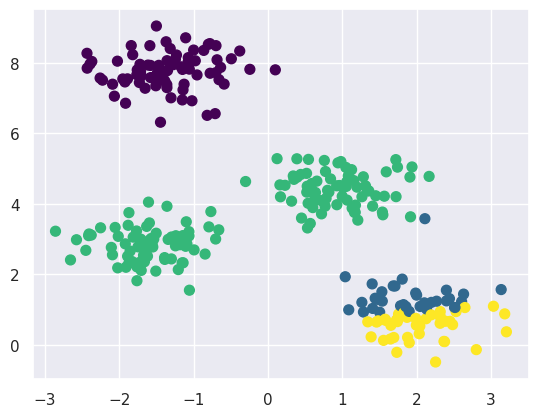

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

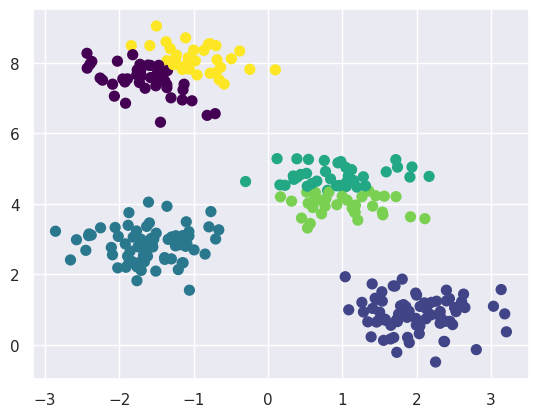

In [ ]:
labels = KMeans(6, random_state=0, n_init=10).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [ ]:
accuracy_score(labels, y_true)

0.5

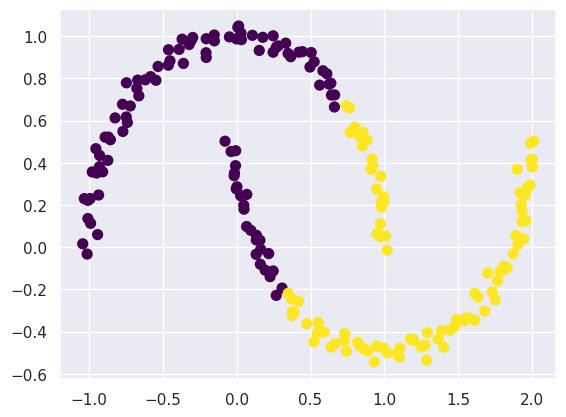

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.03, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [ ]:
accuracy_score(labels, y)

0.75

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


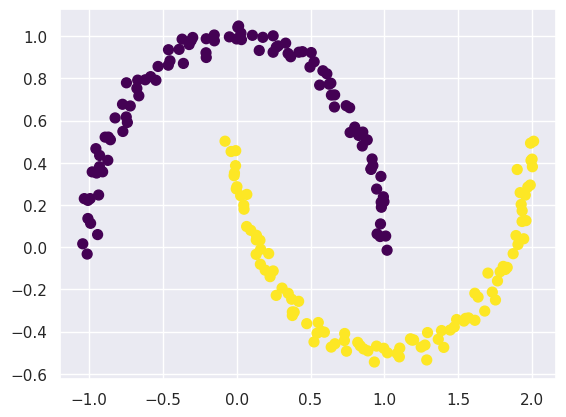

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2,
                           affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(labels, y)

1.0

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.7, random_state=0)
X = X[:, ::-1]

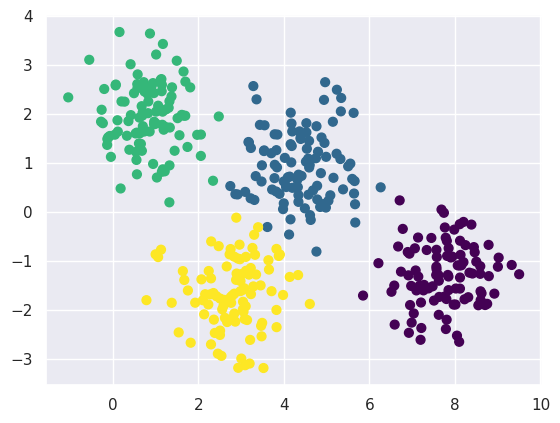

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0, n_init=10)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
      labels = kmeans.fit_predict(X)

      ax = ax or plt.gca()
      ax.axis('equal')
      ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', edgecolor='k',zorder=2)

                  # plot the representation of the KMeans model
      centers = kmeans.cluster_centers_
      radii = [cdist(X[labels == i], [center]).max()
               for i, center in enumerate(centers)]
      for c, r in zip(centers, radii):
           ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))



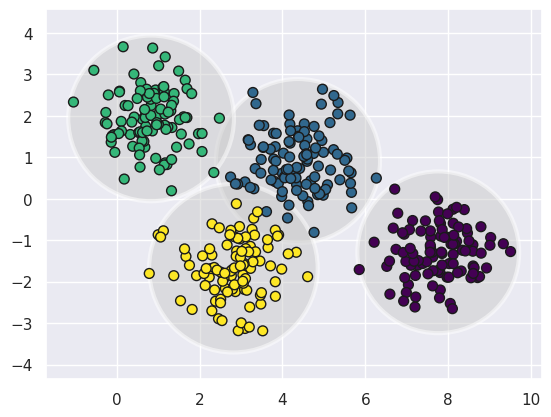

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
plot_kmeans(kmeans, X)

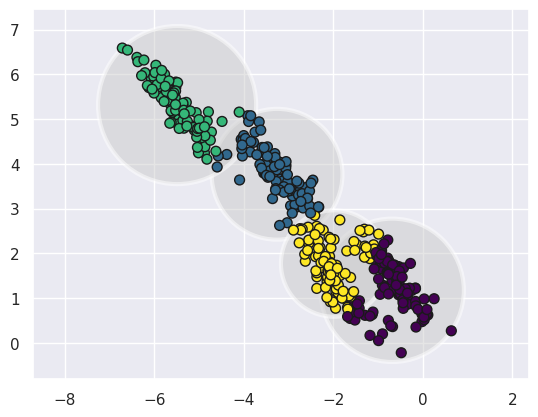

In [ ]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
plot_kmeans(kmeans, X_stretched)

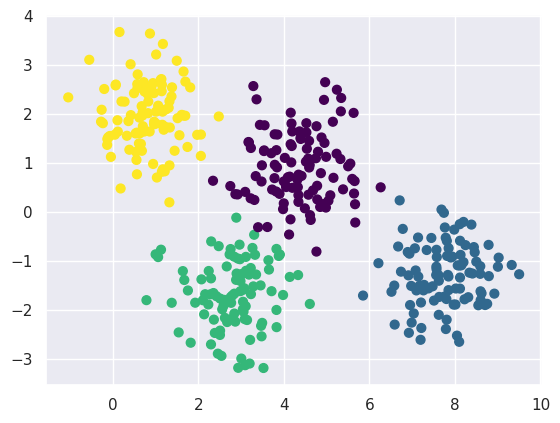

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [ ]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.978 0.022 0.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.999 0.    0.001 0.   ]
 [0.    0.    1.    0.   ]]


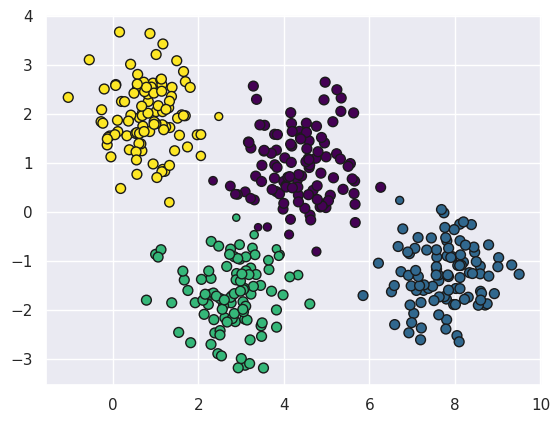

In [ ]:
size = probs.max(1)/0.02
plt.scatter(X[:, 0], X[:, 1], c=labels, edgecolor='k', cmap='viridis', s=size);

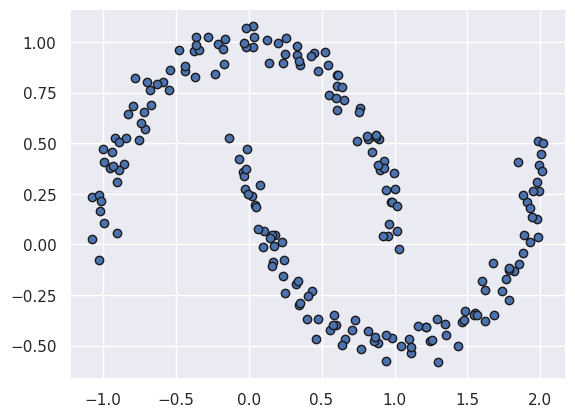

In [ ]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1],edgecolor='k');

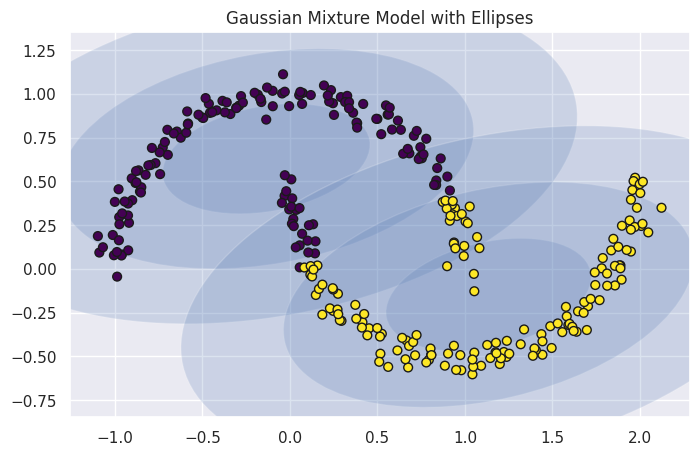

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_moons
def draw_ellipse(position, covariance, ax=None, **kwargs):
      ax = ax or plt.gca()
      if covariance.shape == (2, 2):
         U, s, Vt = np.linalg.svd(covariance)
         angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
         width, height = 2 * np.sqrt(s)
      else:
         angle = 0
         width, height = 2 * np.sqrt(covariance)
      for nsig in range(1, 4):
         ax.add_patch(Ellipse(position, nsig * width, nsig * height,angle=angle, **kwargs))
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2, edgecolor='k')
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2, cmap='viridis', edgecolor='k')
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)


Xmoon, _ = make_moons(n_samples=300, noise=0.05, random_state=0)

gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plt.figure(figsize=(8, 5))
plot_gmm(gmm2, Xmoon)
plt.title("Gaussian Mixture Model with Ellipses")
plt.show()